In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Leitura dos dados de treino
df_train = pd.read_csv('train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
x = df_train[['GrLivArea', 'OverallQual']]  # variáveis utilizadas para treinar o modelo
y = df_train['SalePrice']                   # target de previsão do modelo

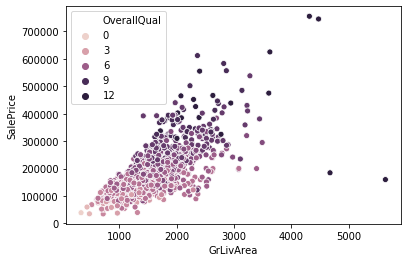

In [9]:
# Gráfico de correlação
sns.scatterplot(x['GrLivArea'], y, x['OverallQual'])

In [8]:
# Coordenadas de uma reta tipo "reta de regressão" => reta de tendência
a_x = 334
b_x = 5000
a_y = 50000
b_y = 900000

In [10]:
variacao_y = b_y - a_y
variacao_x = b_x - a_x
variacao_y /variacao_x

182.16888126875267

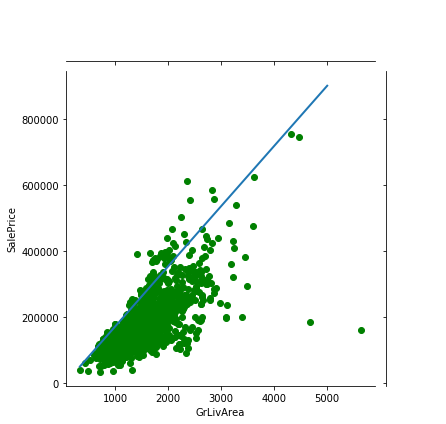

In [11]:
# Gráfico de correlação com uma reta de tendência
grid = sns.JointGrid(x = x['GrLivArea'], y = y)
grid.plot_joint(plt.scatter, color = 'g')
plt.plot((a_x, b_x), (a_y, b_y), linewidth = 2)

In [ ]:
# Diferentemente dos modelos de classificação (que focam na assertividade), os modelos de regressão focam na minimização dos erros.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [13]:
# Regressão do modelo
reg = LinearRegression()

In [14]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
x_test = pd.read_csv('test.csv')
x_test = x_test[['GrLivArea', 'OverallQual']]
y_test = pd.read_csv('sample_submission.csv')
y_test = y_test['SalePrice']

In [17]:
y_pred = reg.predict(x_test)

In [18]:
mean_absolute_error(y_pred = y_pred, y_true = y_test)

51373.948758137274

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
x_scaled = scaler.fit_transform(x)

In [22]:
x_test_scaled = scaler.transform(x_test)

In [23]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = reg.predict(x_test_scaled)

In [25]:
mean_absolute_error(y_pred = y_pred, y_true = y_test)

51373.948758137274

In [27]:
pd.DataFrame({'coeficiente': reg.coef_, 'coluna': x_test.columns })

,coeficiente,coluna
0,296516.695112,GrLivArea
1,295641.426966,OverallQual


In [28]:
reg.intercept_

-52585.63874254897

In [29]:
a_x = 334
b_x = 5000
a_y = 50000
b_y = 900000

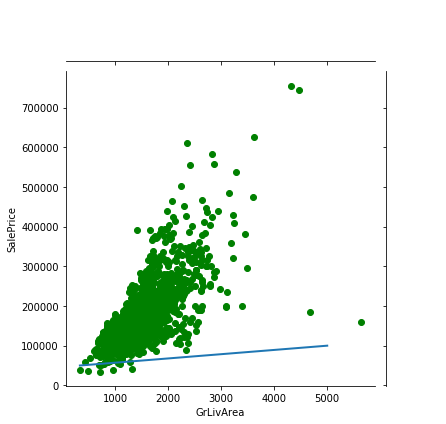

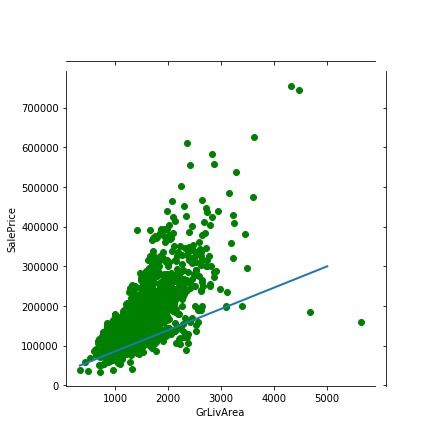

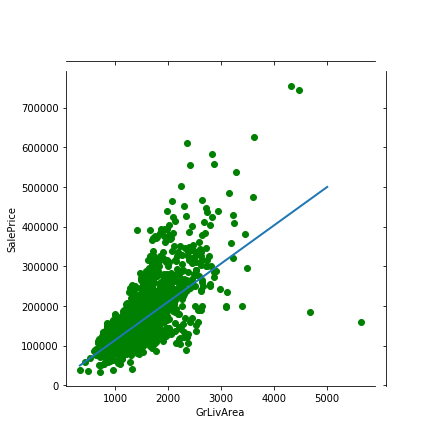

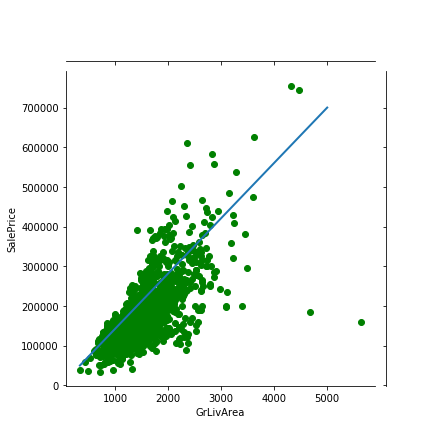

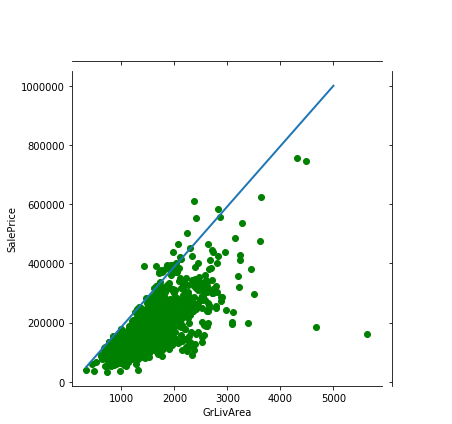

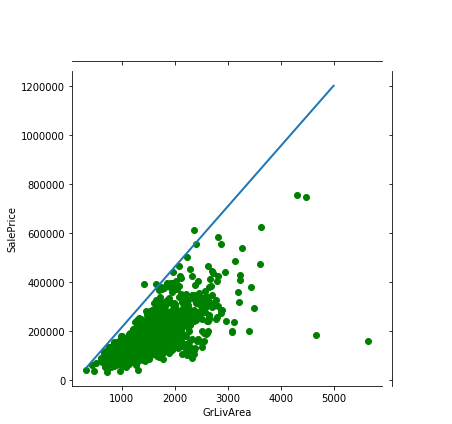

In [30]:
for i in [100000, 300000, 500000, 700000, 1000000, 1200000]:
    grid = sns.JointGrid(x = x['GrLivArea'], y = y)
    grid.plot_joint(plt.scatter, color = 'g')
    plt.plot((a_x, b_x), (a_y, i), linewidth = 2)
    plt.show()

In [31]:
passo = [100000, 300000, 500000, 700000, 1000000, 120000]
residuos = [100000, 60000, 40000, 80000, 100000, 120000]

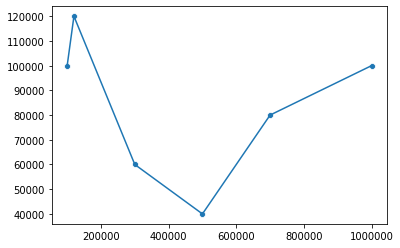

In [32]:
sns.scatterplot(passo, residuos)
sns.lineplot(passo, residuos)

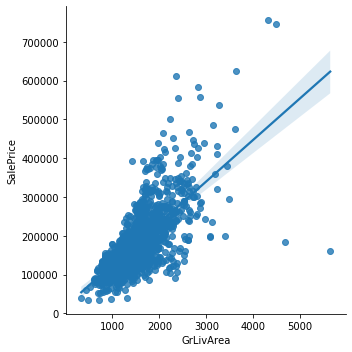

In [33]:
sns.lmplot(x = 'GrLivArea', y = "SalePrice", data = df_train)

In [39]:
# AutoML
from tpot import TPOTRegressor

In [41]:
tp = TPOTRegressor(verbosity = 2, scoring = 'neg_median_absolute_error')

In [42]:
tp.fit(x_scaled, y)

Optimization Progress: 100%|█████████▉| 10099/10100 [8:18:47<00:01,  1.97s/pipeline]
Generation 100 - Current best internal CV score: -16830.177869209234
Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.9, learning_rate=0.1, loss=lad, max_depth=5, max_features=0.8500000000000001, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.9500000000000001)


TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=100,
              log_file=<ipykernel.iostream.OutStream object at 0x000002CCBDB55148>,
              max_eval_time_mins=5, max_time_mins=None, memory=None,
              mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring='neg_median_absolute_error',
              subsample=1.0, template=None, use_dask=False, verbosity=2,
              warm_start=False)